### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Load data
Lets consider a usecase where we have to predict students test outcome i.e., pass (1) or fail(0) based on hours studied.

In this case the outcome to be predicted is discrete.

In [4]:
# Load data
df = pd.read_csv('Data/Grade_Set_1_Classification.csv')

print(df)

   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1


### Fit linear regression

To classify the observation into Pass or Fail (1 or 0), lets build a linear regression and try to use a threshold i.e. anything over some value is pass, else fail

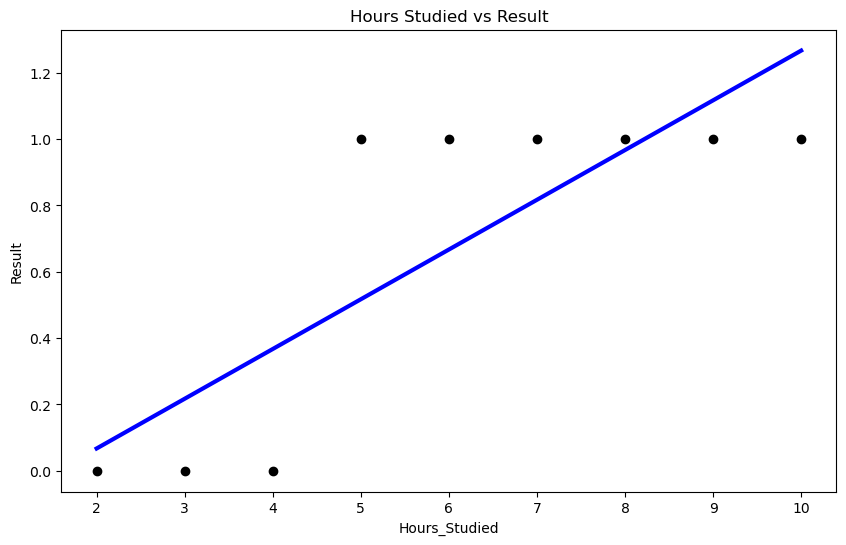

R Squared : 0.6750
Mean Absolute Error: 0.2296
Root Mean Squared Error: 0.2687


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

if __name__ == "__main__":
    x = df['Hours_Studied'].values.reshape(-1, 1)
    y = df['Result'].values

    lr = lm.LinearRegression()
    lr.fit(x, y)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='black')
    plt.plot(x, lr.predict(x), color='blue', linewidth=3)
    plt.title('Hours Studied vs Result')
    plt.ylabel('Result')
    plt.xlabel('Hours_Studied')
    plt.show()

    df['Result_Pred'] = lr.predict(x)

    print(f"R Squared : {r2_score(df.Result, df.Result_Pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(df.Result, df.Result_Pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(df.Result, df.Result_Pred)):.4f}")

### Logistic Regression

The outcome that we are expecting is either 1 or 0, the issue with linear regression is that it can give values large than 1 or less than 0. In the above plot we can see that linear regression is not able to draw boundries to classify observations. 

The solution to this is to introduce sigmoid or ligit function (which takes a S shape) to the regression equatoin. The fundamental idea here is the hypothesis will use the linear approximation, then map with logistic function for binary prediction.

linear regression equation in this case is y = mx + c

Logistic regression can be explained better in odds ration. The odds of an event occuring are defined as the probability of an event occuring divided by the probability of that event not occuring. 

odds ratio of pass vs fail = probability(y=1) / 1-probability(y=1)

A logit is the log base e (log) of the odds, so using logit model:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

In [6]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

The probability of pass is p = .66 and fail is f = 1 - p = .33

The odds of pass and the odds of fail are reciprocals of one another, i.e., 1/2 = .5 and 1/.5 = 2

Now we can use the probabilities to compute the odds of pass and fail,
odds(pass) = p/(1-p) or p/f = .66/.33 = 2
odds(fail) = (1-p)/p or f/p = .33/.66 = .5

Next, we compute the odds ratio for ,
Odds Ration = 2/.5 = 4

Thus the odds of being pass grows 4 times larger with every unit increase in hours studied

Model Accuracy: 1.0000
Predicted Probabilities (y=1):
[0.05367217 0.1531245  0.36565321 0.64759435 0.85419303 0.94917793
 0.98348214 0.99475932 0.99835019]
Class Predictions:
[0 0 0 1 1 1 1 1 1]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


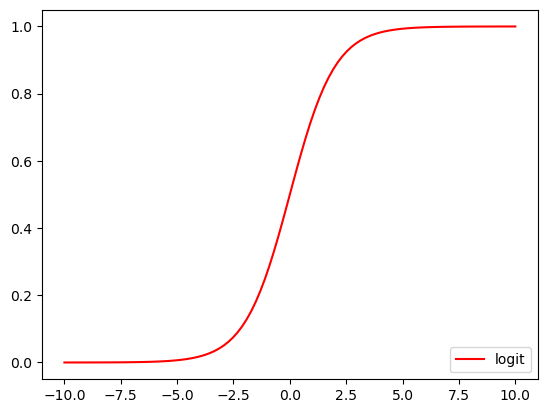

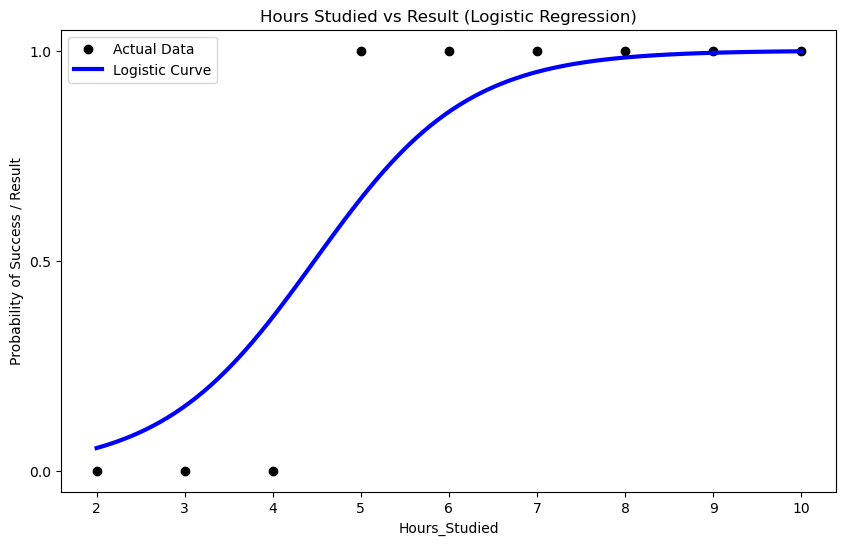

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

if __name__ == "__main__":
    x = df[['Hours_Studied']]
    y = df['Result']

    model = LogisticRegression()
    model.fit(x, y)

    print(f"Model Accuracy: {model.score(x, y):.4f}")
    
    probabilities = model.predict_proba(x)[:, 1]
    predictions = model.predict(x)
    
    print("Predicted Probabilities (y=1):")
    print(probabilities)
    print("Class Predictions:")
    print(predictions)

    plt.figure(figsize=(10, 6))
    plt.scatter(df.Hours_Studied, y, color='black', label='Actual Data')
    
    x_range = np.linspace(df.Hours_Studied.min(), df.Hours_Studied.max(), 100).reshape(-1, 1)
    y_range_proba = model.predict_proba(x_range)[:, 1]
    
    plt.plot(x_range, y_range_proba, color='blue', linewidth=3, label='Logistic Curve')
    plt.yticks([0.0, 0.5, 1.0])
    plt.title('Hours Studied vs Result (Logistic Regression)')
    plt.ylabel('Probability of Success / Result')
    plt.xlabel('Hours_Studied')
    plt.legend()
    plt.show()

In [10]:
from sklearn import metrics

if __name__ == "__main__":
    y_pred = model.predict(x)
    y_proba = model.predict_proba(x)[:, 1]

    print(f"Accuracy : {metrics.accuracy_score(y, y_pred):.4f}")
    print(f"AUC      : {metrics.roc_auc_score(y, y_proba):.4f}")

    print("\nConfusion Matrix :")
    print(metrics.confusion_matrix(y, y_pred))

    print("\nClassification Report :")
    print(metrics.classification_report(y, y_pred))

Accuracy : 1.0000
AUC      : 1.0000

Confusion Matrix :
[[3 0]
 [0 6]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Plot ROC curve

ROC AUC: 1.00


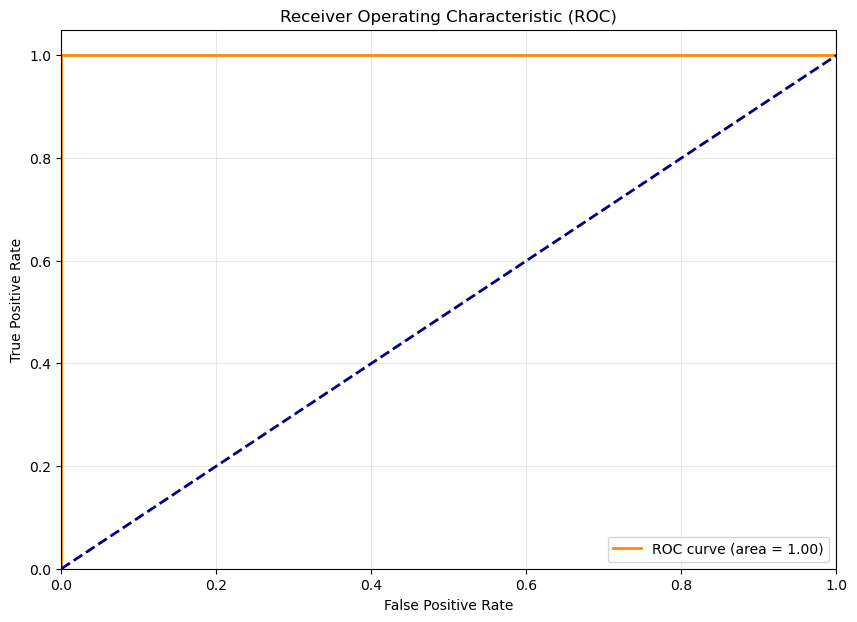

In [12]:
import matplotlib.pyplot as plt
from sklearn import metrics

if __name__ == "__main__":
    fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    
    print(f"ROC AUC: {roc_auc:.2f}")

    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

Logistic Regression Diagnostics

Inverse of regularization (C is float, default value is 1) is one of the key aspect of fitting logistic regression line.

C = 1   , Accuracy: 1.0000
C = 10  , Accuracy: 1.0000
C = 100 , Accuracy: 1.0000
C = 1000, Accuracy: 1.0000


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


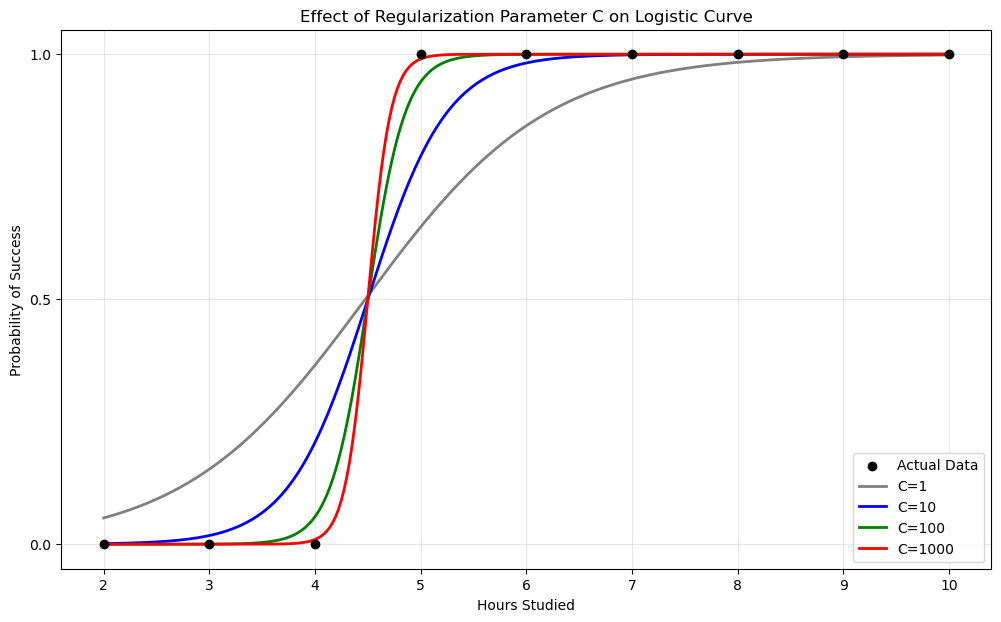

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

if __name__ == "__main__":
    x = df[['Hours_Studied']]
    y = df['Result']

    # Define C values to iterate
    c_values = [1, 10, 100, 1000]
    colors = ['gray', 'blue', 'green', 'red']
    models = []

    plt.figure(figsize=(12, 7))
    plt.scatter(df.Hours_Studied, y, color='black', label='Actual Data', zorder=5)

    # Use a smooth range for plotting the Sigmoid curves
    x_range = np.linspace(df.Hours_Studied.min(), df.Hours_Studied.max(), 300).reshape(-1, 1)

    for c, color in zip(c_values, colors):
        model = LogisticRegression(C=c)
        model.fit(x, y)
        models.append(model)
        
        acc = metrics.accuracy_score(y, model.predict(x))
        print(f"C = {c:<4}, Accuracy: {acc:.4f}")
        
        y_proba = model.predict_proba(x_range)[:, 1]
        plt.plot(x_range, y_proba, color=color, linewidth=2, label=f'C={c}')

    plt.yticks([0.0, 0.5, 1.0])
    plt.legend(loc='lower right')
    plt.title('Effect of Regularization Parameter C on Logistic Curve')
    plt.ylabel('Probability of Success')
    plt.xlabel('Hours Studied')
    plt.grid(alpha=0.3)
    plt.show()